In [3]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 48.0 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 49.5 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [statsmodels] [statsmodels]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson

## Import database

In [5]:
df = pd.read_csv('../data/Test O_G_Equipment_Data.csv', sep=';', decimal=',')
len(df)

800

In [6]:
df.head(3)

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.2352,47.6573,46.4418,64.8203,66.4545,44.4832,FALSO
1,2,2,4,60.8072,63.1721,62.0060,80.7144,81.2464,60.2287,FALSO
2,3,2,1,79.0275,83.0322,82.6421,98.2544,98.7852,80.9935,FALSO


#### Defining types of columns

In [7]:
target_col = ['Fail']
numeric_cols = df.select_dtypes(include=['float64']).columns
categorical_cols_int  = df.select_dtypes(include=['int']).columns

In [8]:
print(numeric_cols)

Index(['Temperature', 'Pressure', 'VibrationX', 'VibrationY', 'VibrationZ',
       'Frequency'],
      dtype='object')


In [9]:
print(categorical_cols_int)

Index(['Cycle', 'Preset_1', 'Preset_2'], dtype='object')


In [11]:
df = df.sort_values(by='Cycle').reset_index(drop=True)
df.index.name = 'Time'

del df['Cycle']  # Remove Cycle 
df.head(3)

,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
Time,,,,,,,,,
0,3,6,44.2352,47.6573,46.4418,64.8203,66.4545,44.4832,FALSO
1,2,4,60.8072,63.1721,62.0060,80.7144,81.2464,60.2287,FALSO
2,2,1,79.0275,83.0322,82.6421,98.2544,98.7852,80.9935,FALSO


### Functions to detect autocorrelation

In [12]:
def plot_autocorrelation(data: pd.Series, max_lags: int = 40, col_name: str = "") -> None:
    """Plota a Função de Autocorrelação (ACF) para uma série temporal."""
    
    # Cria o título do gráfico
    title: str = f'Função de Autocorrelação (ACF) para {col_name}'
    
    # Cria a figura e o eixo
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plota a ACF. O alpha define o intervalo de confiança (zona azul).
    plot_acf(data.dropna(), lags=max_lags, ax=ax, title=title)
    
    ax.set_xlabel('Lag (Defasagem Temporal)')
    ax.set_ylabel('Autocorrelação')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def run_durbin_watson_test(data: pd.Series, col_name: str = "") -> float:
    """Calcula a estatística Durbin-Watson para a série."""
    
    # Teste de Durbin-Watson para detectar autocorrelação de primeira ordem (lag 1).
    
    dw_statistic: float = durbin_watson(data.dropna().values)
    
    print(f"\nTeste Durbin-Watson para {col_name}: {dw_statistic:.4f}")
    
    # Interpretação Rápida:
    # DW ≈ 2 -> Ausência de autocorrelação serial.
    # DW < 2 (próximo de 0) -> Forte autocorrelação positiva.
    # DW > 2 (próximo de 4) -> Forte autocorrelação negativa.
    if dw_statistic < 1.5:
        print("  -> Autocorrelação Positiva Forte Sugerida.")
    elif dw_statistic > 2.5:
        print("  -> Autocorrelação Negativa Forte Sugerida.")
    else:
        print("  -> Autocorrelação de 1ª ordem Baixa (Próximo de 2).")

    return dw_statistic

### Aplying analysis em numerical data

#### Autocorrelation detected in lags:

 
- Temperature - lag3
- Pressure - lag5
- VibrationX e Y e Z - lag8
- Frequency - lag8
- Target - lag10



--- Analisando Variável: Temperature ---


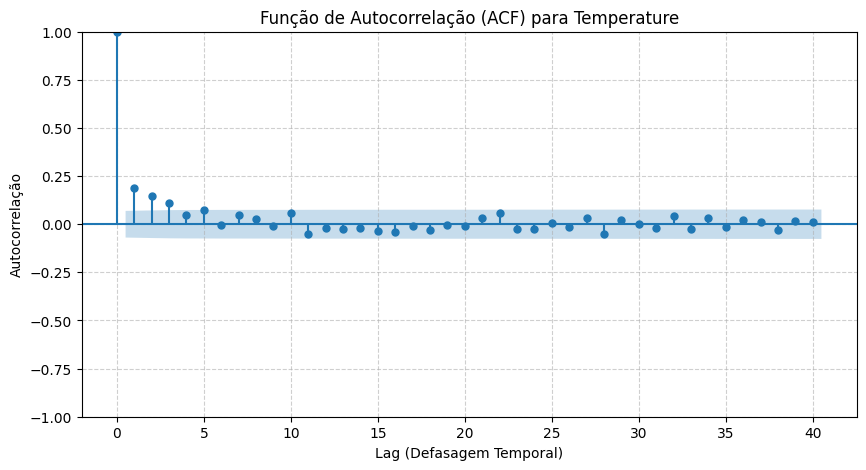


Teste Durbin-Watson para Temperature: 0.1937
  -> Autocorrelação Positiva Forte Sugerida.
------------------------------

--- Analisando Variável: Pressure ---


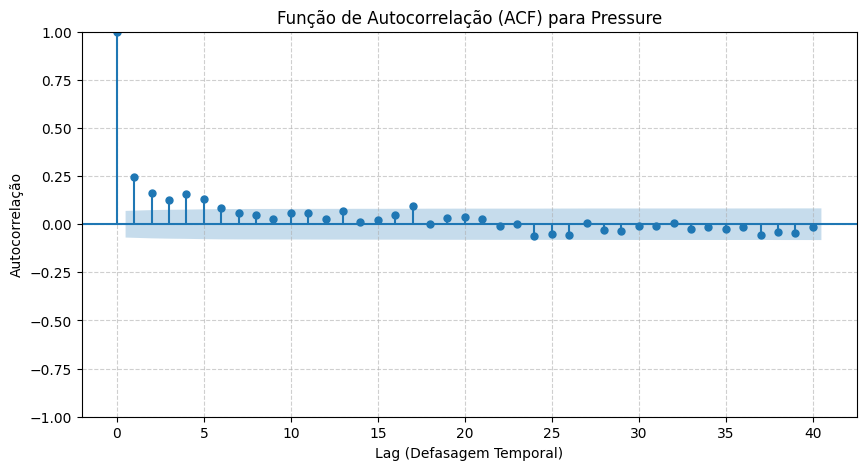


Teste Durbin-Watson para Pressure: 0.2176
  -> Autocorrelação Positiva Forte Sugerida.
------------------------------

--- Analisando Variável: VibrationX ---


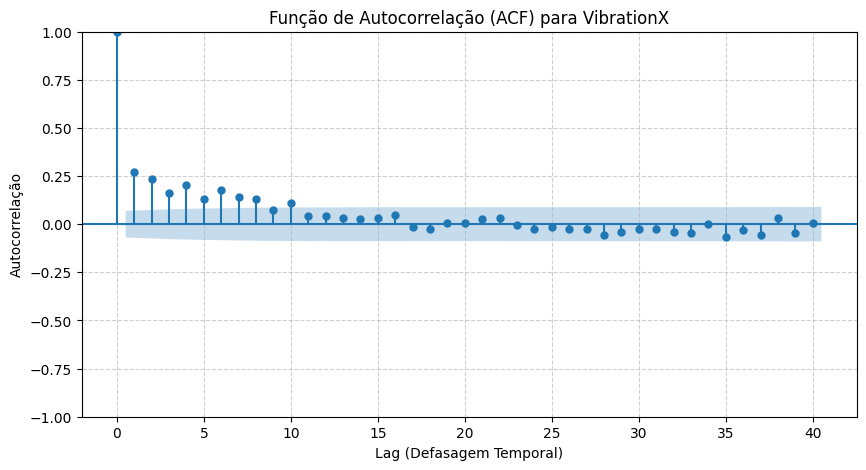


Teste Durbin-Watson para VibrationX: 0.2199
  -> Autocorrelação Positiva Forte Sugerida.
------------------------------

--- Analisando Variável: VibrationY ---


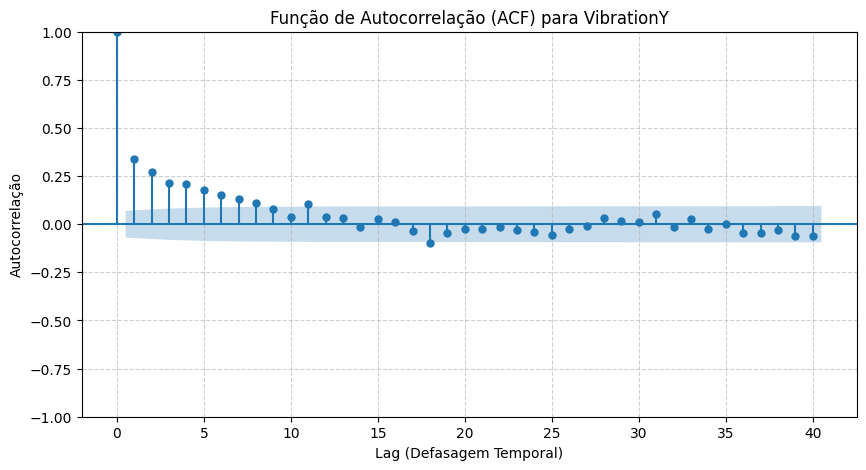


Teste Durbin-Watson para VibrationY: 0.2209
  -> Autocorrelação Positiva Forte Sugerida.
------------------------------

--- Analisando Variável: VibrationZ ---


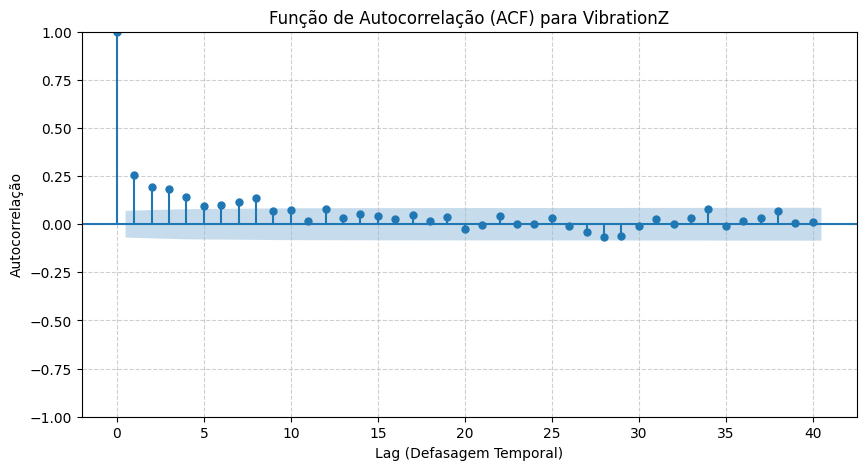


Teste Durbin-Watson para VibrationZ: 0.1936
  -> Autocorrelação Positiva Forte Sugerida.
------------------------------

--- Analisando Variável: Frequency ---


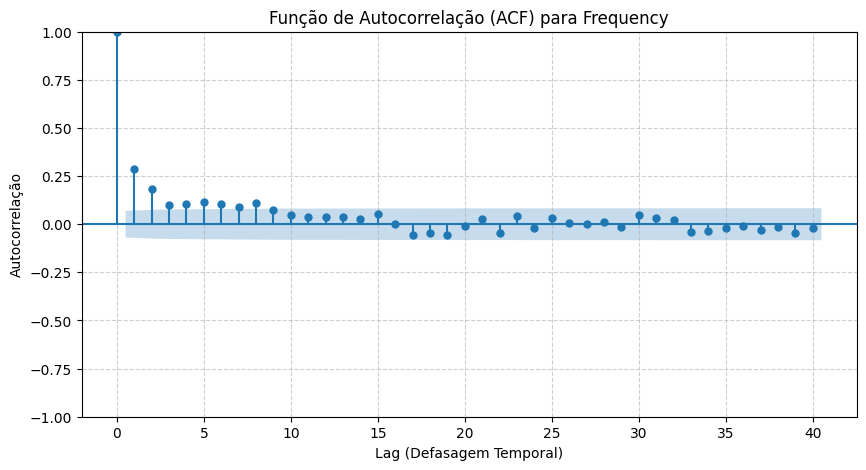


Teste Durbin-Watson para Frequency: 0.2201
  -> Autocorrelação Positiva Forte Sugerida.
------------------------------


In [15]:

for i in numeric_cols:
    print(f"\n--- Analisando Variável: {i} ---")
    
    # ACF Plot
    plot_autocorrelation(df[i], max_lags=40, col_name=i)
    
    #Teste Durbin-Watson)
    run_durbin_watson_test(df[i], i)
    
    print("-" * 30)

### Examining for Target Var

In [17]:
df['Target'] = np.where(df['Fail'] == "VERDADEIRO", 1, 0)

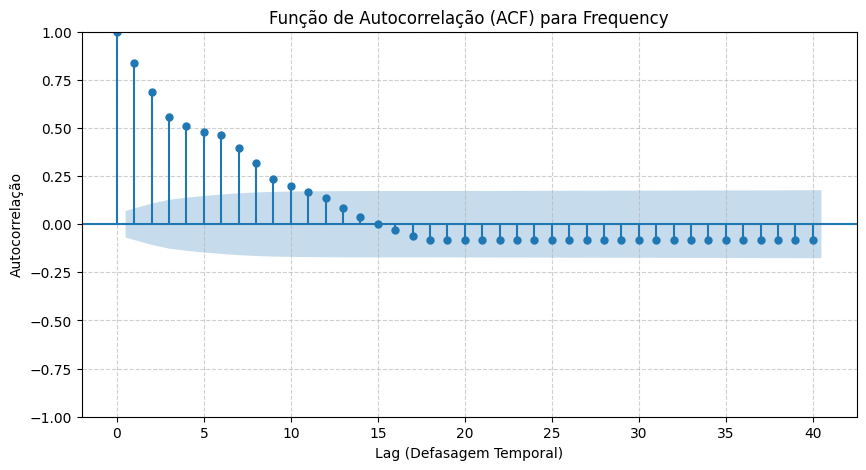


Teste Durbin-Watson para Frequency: 0.2879
  -> Autocorrelação Positiva Forte Sugerida.


np.float64(0.2878787878787879)

In [18]:
# ACF Plot
plot_autocorrelation(df['Target'], max_lags=40, col_name=i)
    
    #Teste Durbin-Watson)
run_durbin_watson_test(df['Target'], i)